In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [2]:
def imshow(title = 'Image', image = None, size = 5):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio, size))
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

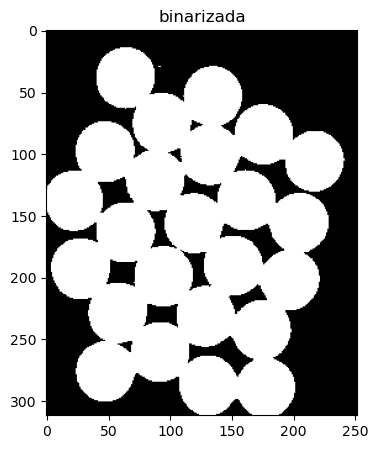

In [3]:
imagen = "coins.jpeg"
img = cv.imread(imagen)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
imshow("binarizada", thresh)

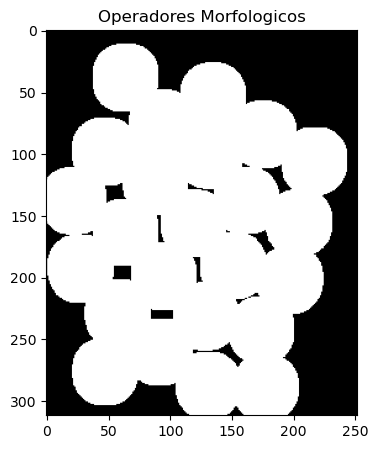

In [4]:
kernel = np.ones((3,3), np.uint8)
opening = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel, iterations=2)
sure_bg = cv.dilate(opening, kernel, iterations=3)
imshow("Operadores Morfologicos", sure_bg)

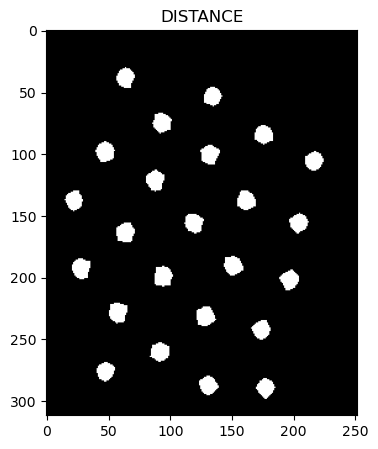

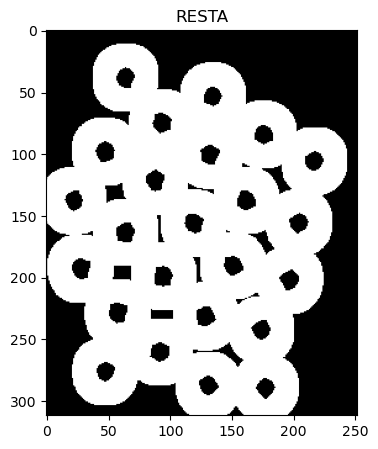

In [6]:
dist_transform = cv.distanceTransform(opening, cv.DIST_L2, 5)
ret, sure_fg = cv.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

sure_fg = np.uint8(sure_fg)
imshow("DISTANCE", sure_fg)

unknown = cv.subtract(sure_bg, sure_fg)
imshow("RESTA", unknown)